# XGBoost Model
We used the XGBoost random forest regression model to train our data to predict the estimated pp for the week 9 sample users. After normalizing the entire dataframe, our root mean squared error, which measures the difference between our model predictions and the actual data, came out to be 0.83895 under a 0.2 test rate, and 0.83556 under a 0.3 test rate. 

In [1]:
import sys
sys.path.append('../..')
from config import client
from mlpp.data_modeling.preliminary_modeling import get_dataframe
from mlpp.data_modeling.preliminary_modeling import Xgboost_est_pp_model
import pandas as pd
import seaborn as sns

In [2]:
db = client['osu_random_db']

## Import Data

In [3]:
df = get_dataframe(db.week_9_sample_users, db.osu_scores_high, db.osu_beatmaps)

In [4]:
df

,count50,count100,count300,countmiss,countgeki,countkatu,perfect,countNormal,countSlider,countSpinner,countTotal,diff_approach,diff_drain,diff_overall,diff_size,hit_length,est_user_pp
0,2,76,133,5,4,20,0,155,60,1,278,5.0,4.0,5.0,5.0,155,114.756841
1,6,24,70,5,14,11,0,79,24,2,133,5.0,5.0,5.0,5.0,64,132.594611
2,2,7,185,1,36,5,0,158,37,0,232,3.0,2.0,3.0,3.0,209,63.021358
3,2,19,230,11,63,11,0,249,12,1,276,4.0,3.0,4.0,5.0,145,61.159836
4,5,41,87,9,38,19,0,92,44,6,198,5.0,5.0,5.0,6.0,129,57.935610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,7,21,141,1,35,15,0,48,120,2,294,6.0,3.0,4.0,3.0,84,47.473359
3,6,45,177,5,34,19,0,78,153,2,390,7.7,4.7,6.6,4.0,92,61.380520
4,0,12,156,0,26,8,0,70,98,0,266,5.0,4.0,4.0,3.0,77,44.234345
5,3,14,168,0,46,9,0,82,102,1,289,5.5,4.0,4.0,3.0,91,7.999520


## Data Preparation 

In [5]:
norm_X, y = Xgboost_est_pp_model.data_processing(df)

In [6]:
norm_X, y

(     count50  count100  count300  countmiss  countgeki  countkatu   perfect  \
 0  -0.444472  2.239352 -0.325688   0.177070  -1.417868   0.563957 -0.323943   
 1   0.293708 -0.034940 -1.047833   0.177070  -0.874618  -0.265230 -0.323943   
 2  -0.444472 -0.778459  0.270369  -0.519977   0.320531  -0.818022 -0.323943   
 3  -0.444472 -0.253622  0.786187   1.222640   1.787305  -0.265230 -0.323943   
 4   0.109163  0.708579 -0.852968   0.874116   0.429181   0.471825 -0.323943   
 ..       ...       ...       ...        ...        ...        ...       ...   
 2   0.478253 -0.166149 -0.233987  -0.519977   0.266206   0.103297 -0.323943   
 3   0.293708  0.883524  0.178668   0.177070   0.211881   0.471825 -0.323943   
 4  -0.813562 -0.559777 -0.062047  -0.694238  -0.222719  -0.541626 -0.323943   
 5  -0.259927 -0.472304  0.075504  -0.694238   0.863781  -0.449494 -0.323943   
 6  -0.629017 -0.734723 -1.024908  -0.519977  -0.602993  -0.818022 -0.323943   
 
     countNormal  countSlider  countSp

## Model Training and Testing

In [7]:
y_pred_point2, y_test_point2, rmse_percent_point2 = Xgboost_est_pp_model().train_test_model(norm_X, y, 0.2)

In [78]:
y_pred_vs_real_df_point2 = pd.DataFrame({"y_pred": y_pred_point2, "y_real": y_test_point2})
y_pred_vs_real_df_point2 = y_pred_vs_real_df.sort_values(by=["y_real"])

<AxesSubplot:>

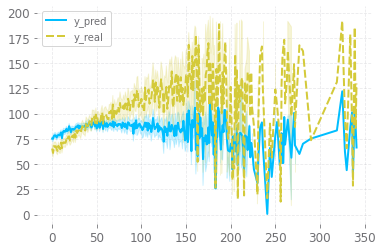

In [79]:
sns.lineplot(data = y_pred_vs_real_df_point2)

In [74]:
rmse_percent_point2

4.9880401255940825

In [80]:
y_pred_point3, y_test_point3, rmse_percent_point3 = Xgboost_est_pp_model().train_test_model(norm_X, y, 0.3)

In [81]:
y_pred_vs_real_df_point3 = pd.DataFrame({"y_pred": y_pred_point2, "y_real": y_test_point2})
y_pred_vs_real_df_point3 = y_pred_vs_real_df.sort_values(by=["y_real"])

<AxesSubplot:>

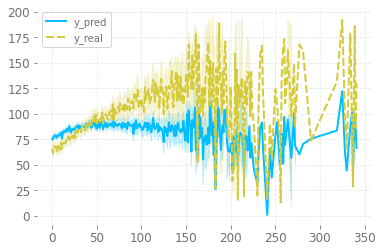

In [82]:
sns.lineplot(data = y_pred_vs_real_df_point3)

In [83]:
rmse_percent_point3

5.091136606719428